## Question 2.2, a base CNN model

In [1]:
!conda activate DS807

### Import packages

In [2]:
import tensorflow as tf
import data_loader as dl
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

### Import data

In [3]:
df = dl.load_1d_grays()
df

,index,string,CC,D,Y,gray_value,filename
0,1,1836,0,3,6,"[[[166.0], [167.0], [166.0], [162.0], [164.0],...",1.jpg
1,2,1836,0,3,6,"[[[169.0], [168.0], [169.0], [170.0], [166.0],...",2.jpg
2,3,1840,0,4,0,"[[[167.0], [169.0], [169.0], [166.0], [165.0],...",3.jpg
3,4,1840,0,4,0,"[[[167.0], [165.0], [165.0], [165.0], [163.0],...",4.jpg
4,5,1823,0,2,3,"[[[62.0], [45.0], [45.0], [37.0], [40.0], [33....",5.jpg
...,...,...,...,...,...,...,...
11995,11996,1808,0,0,8,"[[[88.0], [62.0], [60.0], [68.0], [61.0], [101...",11996.jpg
11996,11997,1809,0,0,9,"[[[173.0], [171.0], [173.0], [175.0], [174.0],...",11997.jpg
11997,11998,1840,0,4,0,"[[[189.0], [189.0], [189.0], [189.0], [189.0],...",11998.jpg
11998,11999,1840,0,4,0,"[[[191.0], [192.0], [192.0], [192.0], [193.0],...",11999.jpg


In [4]:
df['gray_value'][0]

array([[[166.],
        [167.],
        [166.],
        ...,
        [172.],
        [171.],
        [167.]],

       [[165.],
        [164.],
        [165.],
        ...,
        [165.],
        [166.],
        [166.]],

       [[167.],
        [165.],
        [164.],
        ...,
        [164.],
        [165.],
        [167.]],

       ...,

       [[171.],
        [171.],
        [172.],
        ...,
        [162.],
        [158.],
        [161.]],

       [[171.],
        [171.],
        [172.],
        ...,
        [164.],
        [158.],
        [158.]],

       [[171.],
        [171.],
        [171.],
        ...,
        [167.],
        [161.],
        [149.]]], dtype=float32)

### Extract image grid values drom dataframe

In [4]:
x_values = np.zeros(shape=(12000,56,106,1))
i = 0
while i < 12000:
    x_values[i] = df['gray_value'][i]
    i += 1
x_values.shape

(12000, 56, 106, 1)

### Normalize image values and typecast labels for use in CNN

In [5]:
x_values = x_values/255
cc_values = df['CC'].astype(np.uint8)
d_values = df['D'].astype(np.uint8)
y_values = df['Y'].astype(np.uint8)

### Split data into training- test- and valdiation sets

In [6]:
from sklearn.model_selection import train_test_split

xCC_train, xCC_test, yCC_train, yCC_test = train_test_split(x_values, cc_values, test_size=0.2, random_state=2022)
xCC_train, xCC_val, yCC_train, yCC_val = train_test_split(xCC_train, yCC_train, test_size=0.2, random_state=2022)
print('x shapes:')
print(xCC_train.shape, xCC_val.shape, xCC_test.shape)
print('label shapes:')
print(yCC_train.shape, yCC_val.shape, yCC_test.shape)

x shapes:
(7680, 56, 106, 1) (1920, 56, 106, 1) (2400, 56, 106, 1)
label shapes:
(7680,) (1920,) (2400,)


In [31]:
yD_val == yY_val

481     False
4203    False
6110    False
1680    False
4810     True
        ...  
1150    False
9719     True
1764    False
7920    False
8270    False
Length: 1920, dtype: bool

In [7]:
xD_train, xD_test, yD_train, yD_test = train_test_split(x_values, d_values, test_size=0.2, random_state=2022)
xD_train, xD_val, yD_train, yD_val = train_test_split(xD_train, yD_train, test_size=0.2, random_state=2022)
print('x shapes:')
print(xD_train.shape, xD_val.shape, xD_test.shape)
print('label shapes:')
print(yD_train.shape, yD_val.shape, yD_test.shape)

x shapes:
(7680, 56, 106, 1) (1920, 56, 106, 1) (2400, 56, 106, 1)
label shapes:
(7680,) (1920,) (2400,)


In [8]:
xY_train, xY_test, yY_train, yY_test = train_test_split(x_values, y_values, test_size=0.2, random_state=2022)
xY_train, xY_val, yY_train, yY_val = train_test_split(xY_train, yY_train, test_size=0.2, random_state=2022)
print('x shapes:')
print(xY_train.shape, xY_val.shape, xY_test.shape)
print('label shapes:')
print(yY_train.shape, yY_val.shape, yY_test.shape)

x shapes:
(7680, 56, 106, 1) (1920, 56, 106, 1) (2400, 56, 106, 1)
label shapes:
(7680,) (1920,) (2400,)


In [18]:
yCC_test.shape

(2400,)

In [17]:
type(yCC_test)

pandas.core.series.Series

In [21]:
type(yCC_test[6894])

numpy.uint8

### A common CNN model architecture

In [20]:
model_multiclass = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(56, 106, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax'),
    ])

model_multiclass.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
    ) 

model_multiclass.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 54, 104, 32)       320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 52, 102, 64)       18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 100, 128)      73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 98, 256)       295168    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1204224)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                77070400  
_________________________________________________________________
dense_7 (Dense)              (None, 11)               

In [9]:
model_CC = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(56, 106, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model_CC.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy'],
    ) 

model_CC.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 104, 32)       320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 102, 64)       18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 100, 128)      73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 98, 256)       295168    
_________________________________________________________________
flatten (Flatten)            (None, 1204224)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                77070400  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

### Fit the CNN - CC_labels

In [10]:
history = model_CC.fit(xCC_train, yCC_train, validation_data=(xCC_val, yCC_val), epochs=5, verbose=1)

Epoch 1/5
240/240 [==============================] - 10s 27ms/step - loss: 0.1831 - accuracy: 0.9608 - val_loss: 0.1519 - val_accuracy: 0.9667
Epoch 2/5
240/240 [==============================] - 6s 26ms/step - loss: 0.1500 - accuracy: 0.9680 - val_loss: 0.1381 - val_accuracy: 0.9667
Epoch 3/5
240/240 [==============================] - 6s 26ms/step - loss: 0.1304 - accuracy: 0.9680 - val_loss: 0.1390 - val_accuracy: 0.9667
Epoch 4/5
240/240 [==============================] - 6s 26ms/step - loss: 0.0997 - accuracy: 0.9727 - val_loss: 0.1080 - val_accuracy: 0.9677
Epoch 5/5
240/240 [==============================] - 6s 26ms/step - loss: 0.0891 - accuracy: 0.9743 - val_loss: 0.0906 - val_accuracy: 0.9745


#### Plot CNN performance on loss and accuracy measures

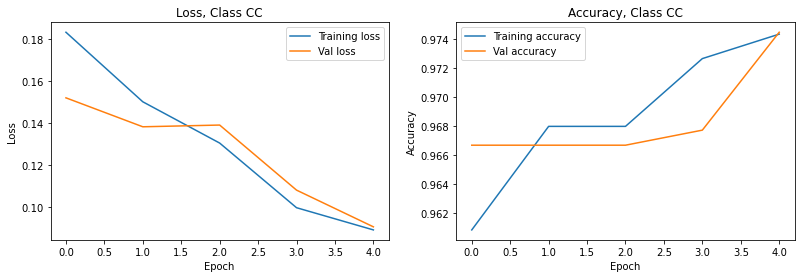

In [11]:
fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss, Class CC')

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy, Class CC')

plt.show()

### Fit the CNN - D_labels

In [21]:
history = model_multiclass.fit(xD_train, yD_train, validation_data=(xD_val, yD_val), epochs=10, verbose=1)

Epoch 1/10
240/240 [==============================] - 9s 27ms/step - loss: 1.6012 - accuracy: 0.3436 - val_loss: 1.3244 - val_accuracy: 0.4844
Epoch 2/10
240/240 [==============================] - 6s 26ms/step - loss: 1.2520 - accuracy: 0.5242 - val_loss: 1.2079 - val_accuracy: 0.5516
Epoch 3/10
240/240 [==============================] - 6s 26ms/step - loss: 0.9515 - accuracy: 0.6518 - val_loss: 0.8605 - val_accuracy: 0.6948
Epoch 4/10
240/240 [==============================] - 6s 26ms/step - loss: 0.5819 - accuracy: 0.7939 - val_loss: 0.8067 - val_accuracy: 0.7229
Epoch 5/10
240/240 [==============================] - 6s 26ms/step - loss: 0.2598 - accuracy: 0.9083 - val_loss: 1.0966 - val_accuracy: 0.7078
Epoch 6/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0909 - accuracy: 0.9702 - val_loss: 1.4210 - val_accuracy: 0.6849
Epoch 7/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0536 - accuracy: 0.9844 - val_loss: 1.7301 - val_accuracy: 0.7115

#### Plot CNN performance on loss and accuracy measures

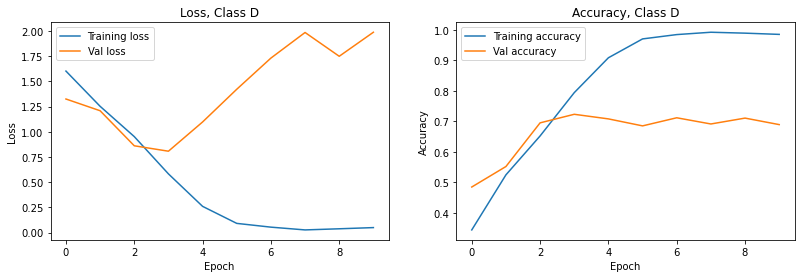

In [22]:
fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss, Class D')

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy, Class D')

plt.show()

### Fit the CNN - Y_labels

In [26]:
history = model_multiclass.fit(xY_train, yY_train, validation_data=(xY_val, yY_val), epochs=10, verbose=1)

Epoch 1/10
240/240 [==============================] - 6s 26ms/step - loss: 2.3592 - accuracy: 0.1120 - val_loss: 2.3579 - val_accuracy: 0.1292
Epoch 2/10
240/240 [==============================] - 6s 26ms/step - loss: 2.3592 - accuracy: 0.1120 - val_loss: 2.3581 - val_accuracy: 0.1292
Epoch 3/10
240/240 [==============================] - 6s 26ms/step - loss: 2.3591 - accuracy: 0.1120 - val_loss: 2.3580 - val_accuracy: 0.1292
Epoch 4/10
240/240 [==============================] - 6s 26ms/step - loss: 2.3592 - accuracy: 0.1120 - val_loss: 2.3580 - val_accuracy: 0.1292
Epoch 5/10
240/240 [==============================] - 6s 26ms/step - loss: 2.3592 - accuracy: 0.1120 - val_loss: 2.3580 - val_accuracy: 0.1292
Epoch 6/10
240/240 [==============================] - 6s 26ms/step - loss: 2.3591 - accuracy: 0.1120 - val_loss: 2.3581 - val_accuracy: 0.1292
Epoch 7/10
240/240 [==============================] - 6s 26ms/step - loss: 2.3592 - accuracy: 0.1120 - val_loss: 2.3580 - val_accuracy: 0.1292

#### Plot CNN performance on loss and accuracy measures

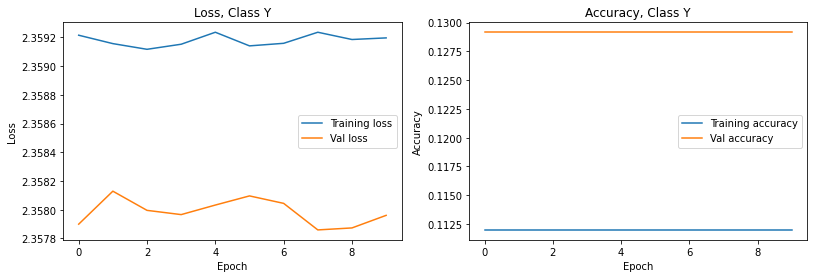

In [27]:
fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss, Class Y')

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy, Class Y')

plt.show()